# Linear

## Import liblary

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

## Mengunduh Dataset

In [98]:
# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Mengambil Data dan Target

In [99]:
# Mengambil data dan target dari dataset MNIST
X = mnist['data'].to_numpy()
y = mnist['target'].astype(int)

## Standarisasi

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
# Membuat objek standarisasi
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Pembagian 70: 30

## Membagi Data

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
# Bagi data menjadi 70% data pelatihan dan 30% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## PCA

In [104]:
from sklearn.decomposition import PCA

# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

## Membuat Model SVM Kernel Linear

In [105]:

# Membuat model SVM
from sklearn.svm import SVC

In [106]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

## Melatih Model

In [107]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

## Prediksi

In [108]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

## Evaluasi

In [109]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
# Evaluasi performa model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")


In [111]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 7:3")

SVM | scaled | linear | 7:3 Accuracy: 0.8381904761904762 = 83.82%
SVM | scaled | linear | 7:3 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2012
           1       0.93      0.97      0.95      2431
           2       0.84      0.84      0.84      2084
           3       0.82      0.81      0.81      2107
           4       0.79      0.79      0.79      2060
           5       0.78      0.75      0.77      1945
           6       0.89      0.92      0.91      2017
           7       0.87      0.88      0.87      2131
           8       0.84      0.76      0.80      2116
           9       0.73      0.73      0.73      2097

    accuracy                           0.84     21000
   macro avg       0.84      0.84      0.84     21000
weighted avg       0.84      0.84      0.84     21000

SVM | scaled | linear | 7:3 Confusion Matrix:
[[1824    4   18   16    8   83   34    2   20    3]
 [   0 2352   13   15    

## Visualisasi

In [112]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

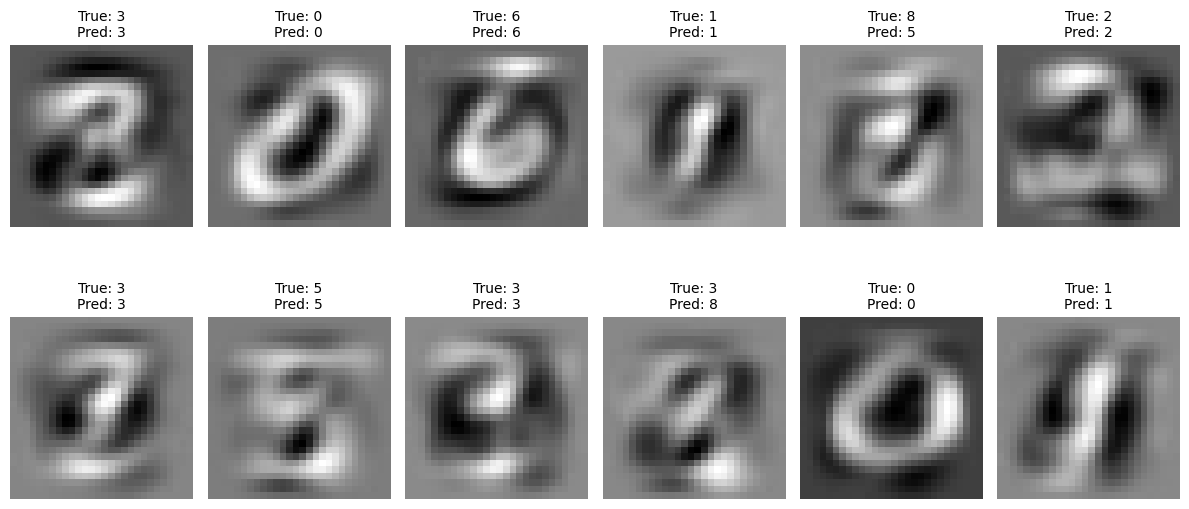

In [113]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Pembagian 80:20

In [114]:
# Bagi data menjadi 80% data pelatihan dan 20% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [116]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

In [117]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

In [118]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

In [119]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 8:2")

SVM | scaled | linear | 8:2 Accuracy: 0.8455 = 84.55%
SVM | scaled | linear | 8:2 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1371
           1       0.91      0.97      0.94      1584
           2       0.87      0.86      0.86      1374
           3       0.83      0.83      0.83      1450
           4       0.80      0.80      0.80      1336
           5       0.79      0.78      0.78      1270
           6       0.91      0.91      0.91      1366
           7       0.89      0.86      0.87      1536
           8       0.83      0.77      0.80      1370
           9       0.72      0.76      0.74      1343

    accuracy                           0.85     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.85      0.85      0.85     14000

SVM | scaled | linear | 8:2 Confusion Matrix:
[[1242    2   12   12    3   67   19    0   13    1]
 [   0 1533    7   14    0    5    5 

In [120]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

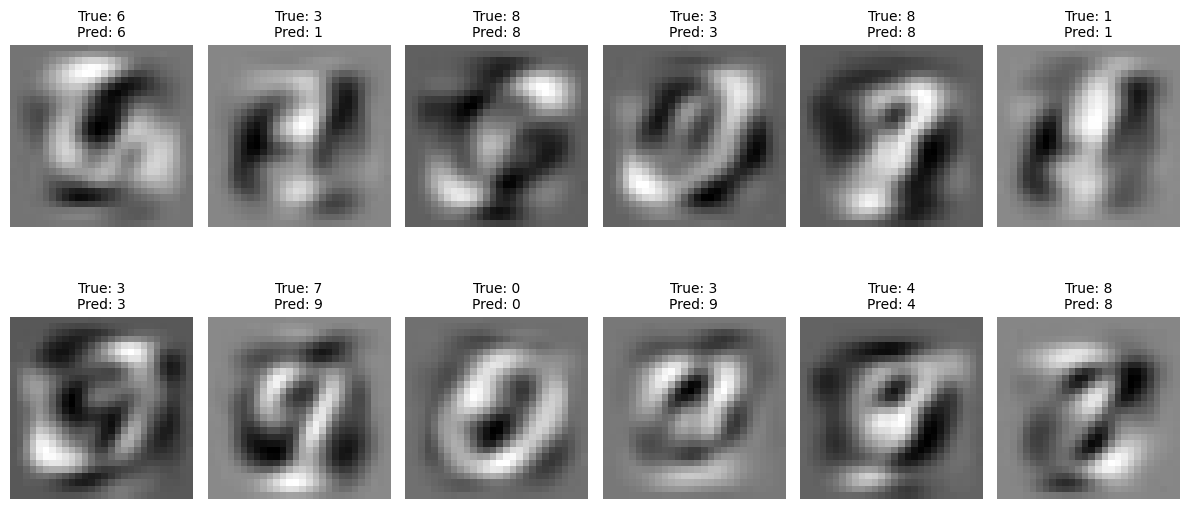

In [121]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Pembagian 90:10

In [122]:
# Bagi data menjadi 80% data pelatihan dan 20% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [123]:
# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [124]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

In [125]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

In [130]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

In [131]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 9:1")

SVM | scaled | linear | 9:1 Accuracy: 0.8377142857142857 = 83.77%
SVM | scaled | linear | 9:1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       705
           1       0.93      0.96      0.94       776
           2       0.83      0.87      0.85       694
           3       0.81      0.82      0.82       718
           4       0.78      0.81      0.79       694
           5       0.76      0.76      0.76       639
           6       0.91      0.91      0.91       696
           7       0.87      0.87      0.87       693
           8       0.84      0.76      0.80       692
           9       0.74      0.72      0.73       693

    accuracy                           0.84      7000
   macro avg       0.84      0.84      0.84      7000
weighted avg       0.84      0.84      0.84      7000

SVM | scaled | linear | 9:1 Confusion Matrix:
[[622   1   9  13   4  41   6   1   5   3]
 [  0 747  10   7   1   2   2   2  

In [133]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

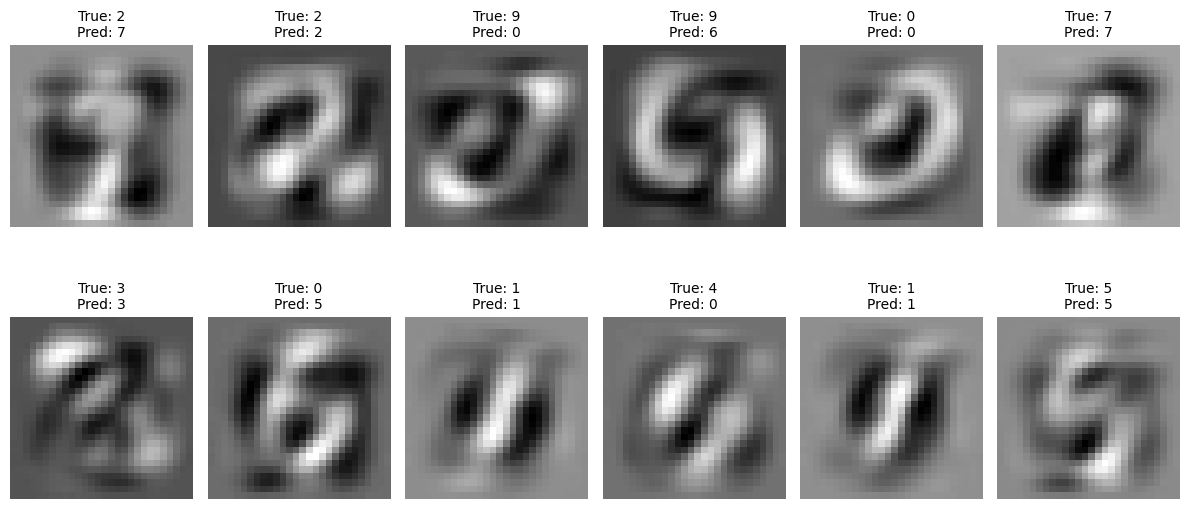

In [134]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()